In [1]:
%load_ext tensorboard

In [2]:
import tensorflow as tf
from keras import models
from keras import layers
import datetime

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='layers_flatten'),
    tf.keras.layers.Dense(512, activation='relu', name='layers_dense'),
    tf.keras.layers.Dropout(0.2, name='layers_dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='layers_dense_2')
  ])

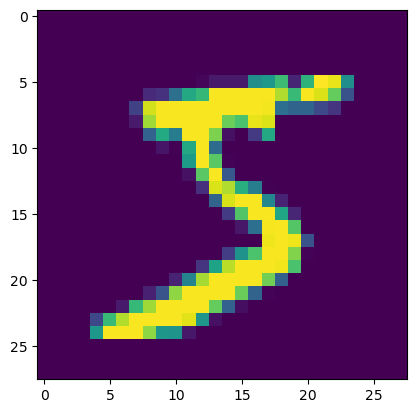

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
import tensorflow as tf
import numpy as np



# Get the image at index 10
image = x_train[10]
image.shape
image = image.reshape(1,28,28,1)

with tf.summary.create_file_writer('/path/to/logs').as_default():
    tf.summary.image('Images', image, step=0)


In [ ]:
%tensorboard --logdir=/path/to/logs --port=6013

In [ ]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2192 - accuracy: 0.9345 - val_loss: 0.1075 - val_accuracy: 0.9664
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0971 - accuracy: 0.9696 - val_loss: 0.0753 - val_accuracy: 0.9770
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0676 - accuracy: 0.9789 - val_loss: 0.0689 - val_accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0530 - accuracy: 0.9834 - val_loss: 0.0648 - val_accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9853 - val_loss: 0.0668 - val_accuracy: 0.9799


In [ ]:
%tensorboard --logdir logs/fit --port=6009